# Titanic Data Cleaning & Preprocessing

In [4]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [6]:
# 2. Load Dataset
df = pd.read_csv("Titanic-Dataset.csv")  # Replace with your path
print("Initial Data Preview:\n", df.head())
print("\nData Info:")
df.info()

Initial Data Preview:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0

In [7]:
# 3. Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# 4. Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.dropna(inplace=True)

/tmp/ipython-input-8-1498484227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-8-1498484227.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [9]:
# 5. Encode Categorical Features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # female = 0, male = 1
df['Embarked'] = le.fit_transform(df['Embarked'])  # S = 2, C = 0, Q = 1
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)

In [10]:
# 6. Standardize Numerical Features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

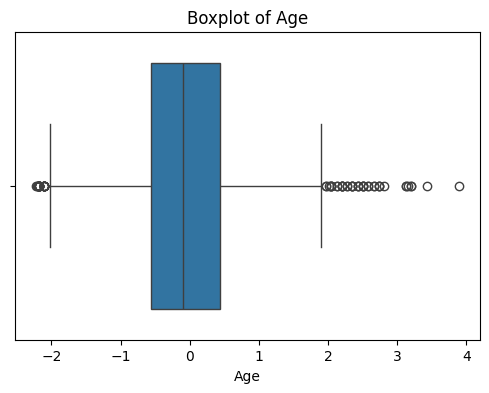

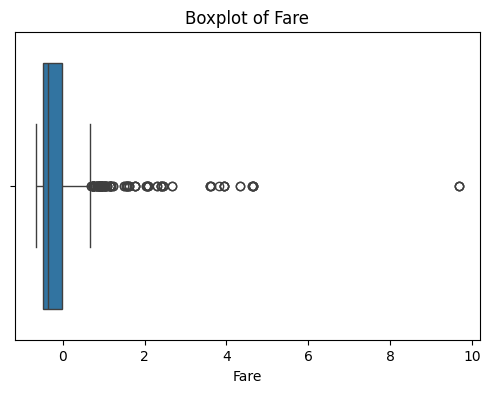

In [11]:
# 7. Visualize Outliers
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [12]:
# 8. Remove Outliers (using IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')

In [13]:
# 9. Final Check
print("\nCleaned Dataset Preview:\n", df.head())
print("\nNull values after cleaning:\n", df.isnull().sum())


Cleaned Dataset Preview:
    PassengerId  Survived                                          Name  Sex  \
0            1         0                       Braund, Mr. Owen Harris    1   
2            3         1                        Heikkinen, Miss. Laina    0   
3            4         1  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4            5         0                      Allen, Mr. William Henry    1   
5            6         0                              Moran, Mr. James    1   

        Age  SibSp  Parch            Ticket      Fare  Embarked  Pclass_2  \
0 -0.565736      1      0         A/5 21171 -0.502445         2     False   
2 -0.258337      0      0  STON/O2. 3101282 -0.488854         2     False   
3  0.433312      1      0            113803  0.420730         2     False   
4  0.433312      0      0            373450 -0.486337         2     False   
5 -0.104637      0      0            330877 -0.478116         1     False   

   Pclass_3  
0      True  
2      

In [14]:
# 10. Save Cleaned Dataset
df.to_csv("titanic_cleaned.csv", index=False)
print("\n✅ Data cleaned and saved as 'titanic_cleaned.csv'")


✅ Data cleaned and saved as 'titanic_cleaned.csv'
